In [1]:
# Name Dipika Sharma
# DSC 530-T301 Data exploration and Analysis
# Week 3

# Chapter 1 Exercise

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)


Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [2]:
# Chapter 1, examples
# Read NSFG data into a Pandas DataFrame.

import nsfg

preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [3]:
# Print the column names.

preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [4]:
# Select a single column name.

preg.columns[4]

'moscurrp'

In [5]:
# Select a column and check what type it is.

pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

In [6]:
# Print a column.

case_id = preg['caseid']
case_id

0            1
1            1
2            2
3            2
4            2
         ...  
13588    12571
13589    12571
13590    12571
13591    12571
13592    12571
Name: caseid, Length: 13593, dtype: int64

In [7]:
# Select a single element from a column.

case_id[3]

2

In [8]:
# Select a slice from a column.
case_id[1:6]

1    1
2    2
3    2
4    2
5    6
Name: caseid, dtype: int64

In [9]:
# Select a column using dot notation.

pregordr = preg.pregordr

In [10]:
# Count the number of times each value occurs.

preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [11]:
# Check the values of another variable.

preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [12]:
preg.pregend1.value_counts().sort_index()

1.0    1921
2.0     120
3.0    1831
4.0     187
5.0    2015
6.0    7129
8.0      20
9.0      18
Name: pregend1, dtype: int64

In [13]:
# Make a dictionary that maps from each respondent's caseid to a list of indices into the pregnancy DataFrame. 
# Use it to select the pregnancy outcomes for a single respondent.
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

In [14]:
caseid = 12571
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([1, 2, 2, 1, 1])

In [15]:
# Chapter 1 Exercise

# Select the birthord column, print the value counts, and compare to results published in the codebook

preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [16]:
# Looking at below results we can see that there are 4413 cases with first pregnancy 
# but according to codebook there is 5033 cases with first pregnancy.
# we can see the difference of 1100 cases in 3rd pregnancy data as the result below showing only 1234 cases where code book shows 2334 cases.
# second highest difference we see for 2nd prgnancy and 4th pregnancy, which is of around 800 cases.

In [17]:
# We can also use isnull to count the number of nans.

preg.birthord.isnull().sum()

4445

In [18]:
# Select the prglngth column, print the value counts, and compare to results published in the codebook

preg.prglngth.value_counts().sort_index()

# Looking at below results we can see 1120 cases completed the 40 weeks of their pregnancy and 4744 cases completed the 39 weeks.
# In codebook, out of 13593, 13241 cases are inapplicable and only 349 cases share their response.
# looking at the BB2 chart from codebook, we understand that out of 349 cases 229 cases replied in weeks and only 120 cases replied in months.


0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [19]:
# To compute the mean of a column, you can invoke the mean method on a Series. 
# For example, here is the mean birthweight in pounds:

preg.totalwgt_lb.mean()

7.265628457623368

In [20]:
# Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  
# Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, 
# not dot notation.

preg['totalwgt_kg'] = preg.totalwgt_lb / 2.205

In [21]:
preg.totalwgt_kg.mean()

3.2950695952940463

In [22]:
# nsfg.py also provides ReadFemResp, which reads the female respondents file and returns a DataFrame:

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

resp = nsfg.ReadFemResp()

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [23]:
# DataFrame provides a method head that displays the first five rows:

resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [24]:
# Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?

resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [25]:
# Looking below results we can say youngest is 15 year old 
# and oldest is 44 year old.

# We can use the caseid to match up rows from resp and preg. 
# For example, we can select the row from resp for caseid 2298 like this:

resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


In [26]:
# And we can get the corresponding rows from preg like this:

preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.117914
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494331
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899093
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.117914


In [27]:
# How old is the respondent with caseid 1?

resp[resp.caseid==1].age_r

# 44 year old is the respondent with caseid 1

1069    44
Name: age_r, dtype: int64

In [28]:
# What are the pregnancy lengths for the respondent with caseid 2298?

preg[preg.caseid==2298].prglngth

# we see 4 pregnacny detail for case id 2298, 
# the length for 4 pregnancies are as following 40 months, 36 months, 30 months and 40 months.

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [29]:
# What was the birthweight of the first baby born to the respondent with caseid 5012?

preg[preg.caseid==5012].birthwgt_lb

# it seems that baby weight for caseid 5012 is 6 lb.

5515    6.0
Name: birthwgt_lb, dtype: float64

In [30]:
# Chapter 2

import numpy as np

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [31]:
# Given a list of values, there are several ways to count the frequency of each value.
t = [1, 2, 2, 3, 5]

# Creating an empty dictionary
cnt = {}
for item in t:    # iteration to count the values frequencies
    if (item in cnt):
        cnt[item] += 1
    else:
        cnt[item] = 1
cnt

{1: 1, 2: 2, 3: 1, 5: 1}

In [32]:
# soultion from book
# empty dictionary hist
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [33]:
# You can use a Counter (which is a dictionary with additional methods): 
from collections import Counter
count = Counter(t)
count

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [34]:
# Or you can use the Hist object provided by thinkstats2:
import thinkstats2
hist = thinkstats2.Hist(t)
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [35]:
# Hist provides Freq, which looks up the frequency of a value.
hist.Freq(3)

1

In [36]:
# You can also use the bracket operator, which does the same thing.
hist[5]

1

In [37]:
# If the value does not appear, it has frequency 0.
hist[8]

0

In [38]:
# The Values method returns the values:
hist.Values()

dict_keys([1, 2, 3, 5])

In [39]:
# So you can iterate the values and their frequencies like this:

for item in sorted(hist.Values()):
    print(item, hist[item])

1 1
2 2
3 1
5 1


In [40]:
# Or you can use the Items method:

for item, count in hist.Items():
     print(item, count)


1 1
2 2
3 1
5 1


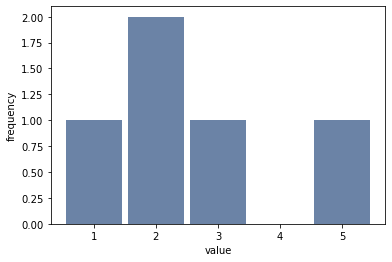

In [41]:
# thinkplot is a wrapper for matplotlib that provides functions that work with the objects in thinkstats2.
# For example Hist plots the values and their frequencies as a bar graph.
# Config takes parameters that label the x and y axes, among other things.

import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

# As an example, I'll replicate some of the figures from the book.
# First, I'll load the data from the pregnancy file and select the records for live births.

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [42]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

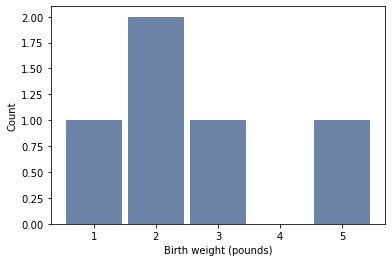

In [43]:
# Here's the histogram of birth weights in pounds.  
# Notice that `Hist` works with anything iterable, including a Pandas Series.  
# The `label` attribute appears in the legend when you plot the `Hist`. 

ist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

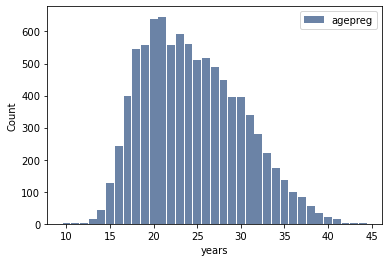

In [44]:
# Before plotting the ages, I'll apply floor to round down:

ages = np.floor(live.agepreg)

hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

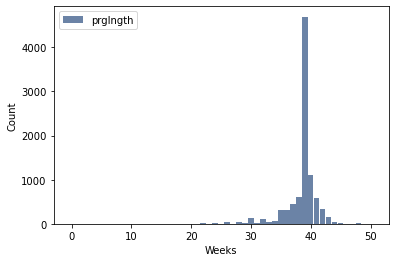

In [45]:
# As an exercise, plot the histogram of pregnancy lengths (column prglngth).

hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Weeks', ylabel='Count')

In [46]:
# Hist provides smallest, which select the lowest values and their frequencies.

for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [47]:
# Use Largest to display the longest pregnancy lengths.

for weeks, freq in hist.Largest(5):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10


In [48]:
# From live births, we can select first babies and others using birthord, 
# then compute histograms of pregnancy length for the two groups.

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

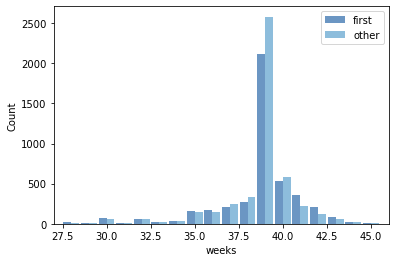

In [49]:
# We can use width and align to plot two histograms side-by-side.

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [50]:
# Series provides methods to compute summary statistics:

mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [52]:
# Here are the mean and standard deviation:
print("Mean is :",mean)

print("Standard Deviation is :",std)

Mean is : 38.56055968517709
Standard Deviation is : 2.702343810070593


In [53]:
# As an exercise, confirm that std is the square root of var:

import math

# to proof, lets calculate the square root of the variance
standardDeviation = math.sqrt(var)

standardDeviation # displaying the value of square root of the variance

2.702343810070593

In [54]:
# Looking at the values of two variable std and standardDeviation we can see both are same.
# Hence standard deciation is square root of the variance.

# Here's are the mean pregnancy lengths for first babies and others:

firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [55]:
# And here's the difference (in weeks):
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [56]:
# This functon computes the Cohen effect size, 
# which is the difference in means expressed in number of standard deviations:

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [57]:
# Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [58]:
# Chapter 2
# Exercise


# Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
# Compute Cohen’s effect size to quantify the difference between the groups. 
# How does it compare to the difference in pregnancy length?

hist_first = thinkstats2.Hist(np.round(firsts.totalwgt_lb), label='firsts')
hist_others=thinkstats2.Hist(np.round(others.totalwgt_lb), label='others')

print('Mean of first babies:', firsts.totalwgt_lb.mean())
print('Mean of others:', others.totalwgt_lb.mean())
print('')

print('Standard Deviation of first babies:', firsts.totalwgt_lb.std())
print('Standard Deviation of others:', others.totalwgt_lb.std())
print('')

print('Median of first babies:', firsts.totalwgt_lb.median())
print('Median of others:', others.totalwgt_lb.median())

Mean of first babies: 7.201094430437772
Mean of others: 7.325855614973262

Standard Deviation of first babies: 1.4205728777207374
Standard Deviation of others: 1.3941954762143138

Median of first babies: 7.3125
Median of others: 7.375


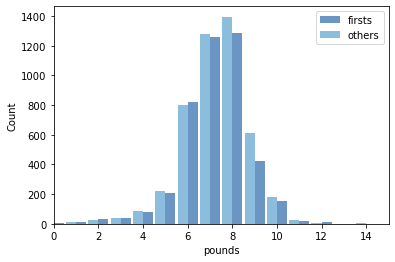

In [59]:
width=0.45
thinkplot.PrePlot(2)
thinkplot.Hist(hist_first, align='left', width=width)
thinkplot.Hist(hist_others, align='right', width=width)
thinkplot.Config(xlabel='pounds', ylabel='Count', xlim=(0, 15))

In [60]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

# We got negative cohen'd vale which indicate that the mean of first babies are smaller then the other babies.

-0.088672927072602

In [61]:
# For the next few exercises, we'll load the respondent file:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

resp = nsfg.ReadFemResp()

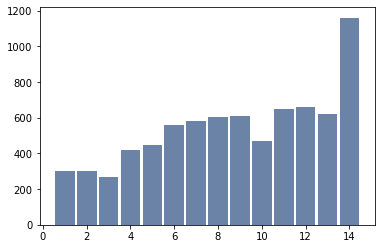

In [62]:
# Make a histogram of totincr the total income for the respondent's family. 
# To interpret the codes see the codebook.

hist_income = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist_income)

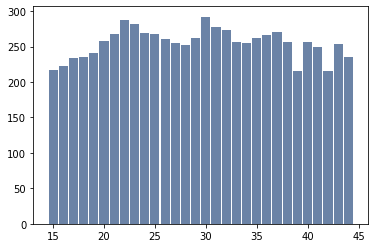

In [63]:
# Make a histogram of age_r, the respondent's age at the time of interview.

hist_age = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist_age)

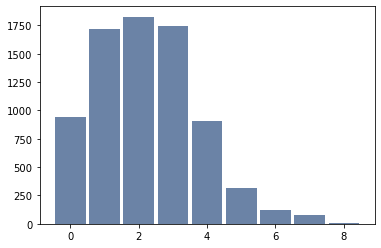

In [64]:
# Make a histogram of numfmhh, 
# the number of people in the respondent's household.

hist_count = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist_count)

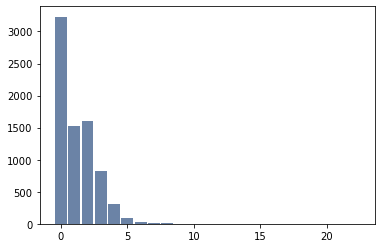

In [65]:
# Make a histogram of parity, the number of children borne by the respondent. 
# How would you describe this distribution?

hist_parity = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist_parity)

In [66]:
# Since the distribution has long right tail, this distribution is Right-skewed distribution.
# The chart clearly shows that most of the women have 1 or 2 childeren 
# and then we see a significant drop in parity after 2 children.

In [67]:
# Use Hist.Largest to find the largest values of parity.

hist_parity.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

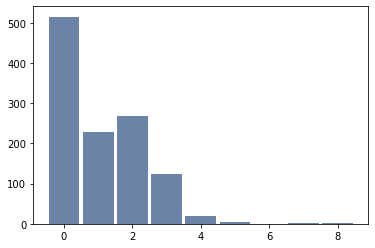

In [68]:
# Let's investigate whether people with higher income have higher parity. Keep in mind that in this study, 
# we are observing different people at different times during their lives, so this data is not the best choice for answering this question. 
# But for now let's take it at face value.
# Use t otincr to select the respondents with the highest income (level 14). 
# Plot the histogram of parity for just the high income respondents.

hinc = resp[resp['totincr'] == 14]
other = resp[resp['totincr'] < 14]
hinc_hist = thinkstats2.Hist(hinc.parity)
thinkplot.Hist(hinc_hist)

In [69]:
# Below distribution shows the high income women have less nmber of kids

# Find the largest parities for high income respondents

hinc_hist.Largest(5)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123)]

In [70]:
# Compare the mean parity for high income respondents and others.

print('mean parity, high income:', hinc.parity.mean())
print('mean parity, other:', other.parity.mean())

mean parity, high income: 1.0758620689655172
mean parity, other: 1.2495758136665125


In [71]:
# Looking below values we undersatnd that the mean of high income women is less then the low income women.

# Compute the Cohen effect size for this difference. 
# How does it compare with the difference in pregnancy length for first babies and others?

CohenEffectSize(hinc.parity, other.parity)

-0.1251185531466061

In [73]:
CohenEffectSize(firsts.prglngth, others.prglngth)

# There's a −0.125 difference in means in terms of sample standard deviation units. 
# Since this is negative, the mean of high income respondent is smaller from mothers with low income.
# Also comparing the difference in pregnency length we understand that 
# the mothers with high income do less number of childrens then the low income.

0.028879044654449883